## import data

In [1]:
import pandas as pd
import os

folder_path = r'C:\Users\RISHI RAMAN\Desktop\vis\unifedmentor\Projects-20240722T093004Z-001\fraud_detection\data'

dfs = []  

for file in os.listdir(folder_path):
    if file.endswith('.pkl'):
        full_path = os.path.join(folder_path, file)
        df = pd.read_pickle(full_path) 
        dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

print(combined_df.head())
print("Shape of combined DataFrame:", combined_df.shape)


   TRANSACTION_ID         TX_DATETIME CUSTOMER_ID TERMINAL_ID  TX_AMOUNT  \
0               0 2018-04-01 00:00:31         596        3156      57.16   
1               1 2018-04-01 00:02:10        4961        3412      81.51   
2               2 2018-04-01 00:07:56           2        1365     146.00   
3               3 2018-04-01 00:09:29        4128        8737      64.49   
4               4 2018-04-01 00:10:34         927        9906      50.99   

  TX_TIME_SECONDS TX_TIME_DAYS  TX_FRAUD  TX_FRAUD_SCENARIO  
0              31            0         0                  0  
1             130            0         0                  0  
2             476            0         0                  0  
3             569            0         0                  0  
4             634            0         0                  0  
Shape of combined DataFrame: (1754155, 9)


In [2]:
print("Shape of combined DataFrame:", combined_df.shape)
print("Dataset Shape:", combined_df.shape)
print("\nDataset Info:")
print(combined_df.info())
print("\nFraud Distribution:")
print(combined_df['TX_FRAUD'].value_counts())
print(f"\nFraud Rate: {combined_df['TX_FRAUD'].mean()*100:.2f}%")

Shape of combined DataFrame: (1754155, 9)
Dataset Shape: (1754155, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        object        
 3   TERMINAL_ID        object        
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    object        
 6   TX_TIME_DAYS       object        
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 120.4+ MB
None

Fraud Distribution:
TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64

Fraud Rate: 0.84%


# Without feature engineering

In [3]:
y = combined_df['TX_FRAUD']
X = combined_df.drop(columns=['TRANSACTION_ID', 'TX_DATETIME', 'TX_FRAUD'])

In [8]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


drop_cols = ['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID']
X = combined_df.drop(columns=drop_cols + ['TX_FRAUD'])
y = combined_df['TX_FRAUD']

for col in ['TX_TIME_SECONDS', 'TX_TIME_DAYS']:
    X[col] = pd.to_numeric(X[col], errors='coerce')

X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)




c:\Users\RISHI RAMAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:46:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, ...)

In [7]:
y_pred = model.predict(X_test)

print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    347895
           1       1.00      1.00      1.00      2936

    accuracy                           1.00    350831
   macro avg       1.00      1.00      1.00    350831
weighted avg       1.00      1.00      1.00    350831



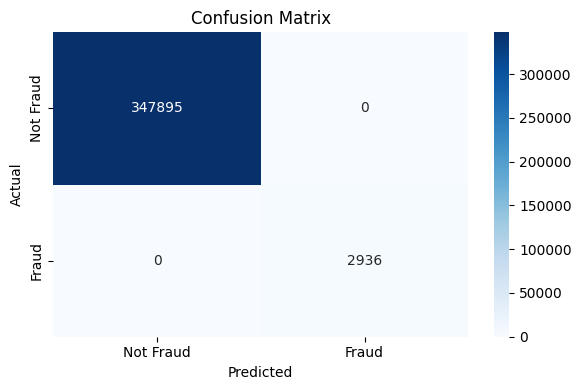

In [9]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [10]:
drop_cols = ['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_FRAUD_SCENARIO']
X = combined_df.drop(columns=drop_cols + ['TX_FRAUD'])
y = combined_df['TX_FRAUD']

In [11]:
for col in['TX_TIME_SECONDS','TX_TIME_DAYS']:
    X[col] = pd.to_numeric(X[col], errors='coerce')


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [12]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()


In [14]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\RISHI RAMAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:54:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [15]:
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Recall: 0.3303814713896458
F1 Score: 0.06877725387315206
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    347895
           1       0.04      0.33      0.07      2936

    accuracy                           0.93    350831
   macro avg       0.52      0.63      0.51    350831
weighted avg       0.99      0.93      0.95    350831



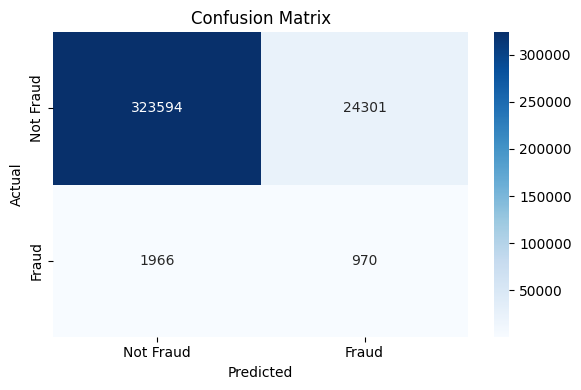

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

### different path

In [19]:
# import pandas as pd
# import os

# # Folder with .pkl files
# folder_path = r'C:\Users\RISHI RAMAN\Desktop\vis\unifedmentor\Projects-20240722T093004Z-001\fraud_detection\data'

# # Destination CSV path on Desktop
# output_csv_path = r'C:\Users\RISHI RAMAN\Desktop\combined_fraud_data.csv'

# # Read and combine all .pkl files
# dfs = []
# for file in os.listdir(folder_path):
#     if file.endswith('.pkl'):
#         full_path = os.path.join(folder_path, file)
#         df = pd.read_pickle(full_path)
#         dfs.append(df)

# combined_df = pd.concat(dfs, ignore_index=True)

# # Save combined data to one CSV file on Desktop
# combined_df.to_csv(output_csv_path, index=False)
# print(f"✅ Combined CSV saved at: {output_csv_path}")



data = pd.read_csv('')


✅ Combined CSV saved at: C:\Users\RISHI RAMAN\Desktop\combined_fraud_data.csv


In [3]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\RISHI RAMAN\Desktop\ml\combined_fraud_data.csv')

In [4]:
data

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0
...,...,...,...,...,...,...,...,...,...
1754150,1754150,2018-09-30 23:56:36,161,655,54.24,15810996,182,0,0
1754151,1754151,2018-09-30 23:57:38,4342,6181,1.23,15811058,182,0,0
1754152,1754152,2018-09-30 23:58:21,618,1502,6.62,15811101,182,0,0
1754153,1754153,2018-09-30 23:59:52,4056,3067,55.40,15811192,182,0,0


In [5]:
print("Shape of combined DataFrame:", data.shape)
print("Dataset Shape:",data.shape)
print("\nDataset Info:")
print(data.info())
print("\nFraud Distribution:")
print(data['TX_FRAUD'].value_counts())
print(f"\nFraud Rate: {data['TX_FRAUD'].mean()*100:.2f}%")

Shape of combined DataFrame: (1754155, 9)
Dataset Shape: (1754155, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TRANSACTION_ID     int64  
 1   TX_DATETIME        object 
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    int64  
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD           int64  
 8   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 120.4+ MB
None

Fraud Distribution:
TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64

Fraud Rate: 0.84%


In [6]:
unique_customers = data['CUSTOMER_ID'].nunique()
total_rows = len(data)
print(f"Unique CUSTOMER_IDs: {unique_customers}")
print(f"Total transactions: {total_rows}")
print(f"Avg transactions per customer: {total_rows / unique_customers:.2f}")

# See customers with multiple transactions
customer_tx_counts = data['CUSTOMER_ID'].value_counts()
repeated_customers = (customer_tx_counts > 1).sum()
print(f"Customers with multiple transactions: {repeated_customers}")

# Optional: peek at top frequent customers
print("\nTop 5 most active customers:\n", customer_tx_counts.head())

Unique CUSTOMER_IDs: 4990
Total transactions: 1754155
Avg transactions per customer: 351.53
Customers with multiple transactions: 4978

Top 5 most active customers:
 CUSTOMER_ID
382     767
3864    762
2891    761
775     754
1411    752
Name: count, dtype: int64


In [7]:
# How many unique terminals?
unique_terminals = data['TERMINAL_ID'].nunique()
print(f"🏧 Unique TERMINAL_IDs: {unique_terminals}")
print(f"🧾 Total transactions: {len(data)}")
print(f"📊 Avg transactions per terminal: {len(data) / unique_terminals:.2f}")

# Terminals with multiple transactions
terminal_tx_counts = data['TERMINAL_ID'].value_counts()
reused_terminals = (terminal_tx_counts > 1).sum()
print(f"🔁 Terminals reused across transactions: {reused_terminals}")

# Optional: peek at busiest terminals
print("\nTop 5 busiest TERMINAL_IDs:\n", terminal_tx_counts.head())


🏧 Unique TERMINAL_IDs: 10000
🧾 Total transactions: 1754155
📊 Avg transactions per terminal: 175.42
🔁 Terminals reused across transactions: 10000

Top 5 busiest TERMINAL_IDs:
 TERMINAL_ID
4018    376
692     372
5295    368
8130    360
872     356
Name: count, dtype: int64


In [8]:
# data.drop(columns=['TRANSACTION_ID'], inplace=True)
data.shape

(1754155, 9)


=== Random Forest ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    347895
           1     0.7500    0.8615    0.8019       195
           2     0.8575    0.9713    0.9109      1815
           3     0.8796    0.6231    0.7295       926

    accuracy                         0.9988    350831
   macro avg     0.8718    0.8640    0.8606    350831
weighted avg     0.9988    0.9988    0.9987    350831



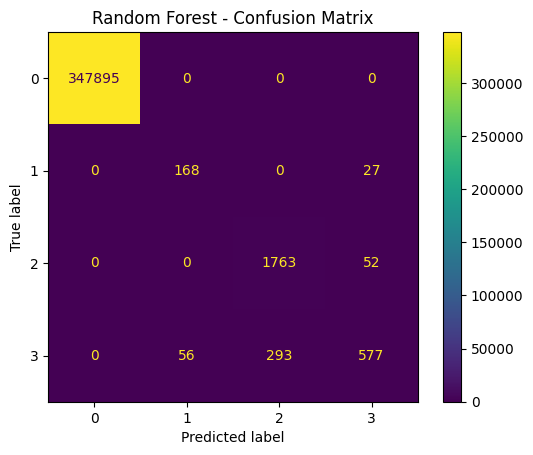


=== XGBoost ===


c:\Users\RISHI RAMAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:22:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    347895
           1     0.7589    0.4359    0.5537       195
           2     0.8956    0.9736    0.9329      1815
           3     0.8155    0.7495    0.7811       926

    accuracy                         0.9989    350831
   macro avg     0.8675    0.7897    0.8169    350831
weighted avg     0.9988    0.9989    0.9988    350831



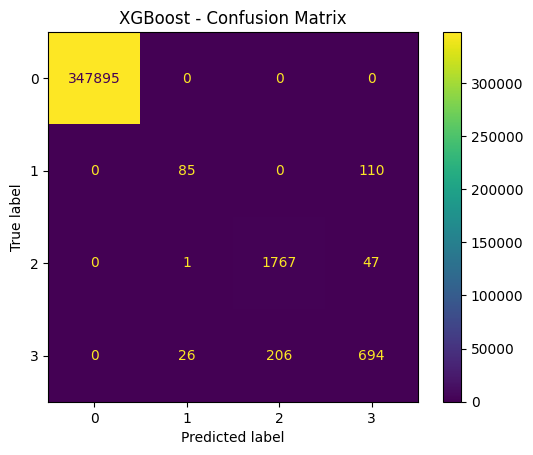


=== LightGBM ===
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1460
[LightGBM] [Info] Number of data points in the train set: 1403324, number of used features: 7
[LightGBM] [Info] Start training from score -0.008405
[LightGBM] [Info] Start training from score -7.497628
[LightGBM] [Info] Start training from score -5.263944
[LightGBM] [Info] Start training from score -5.936916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

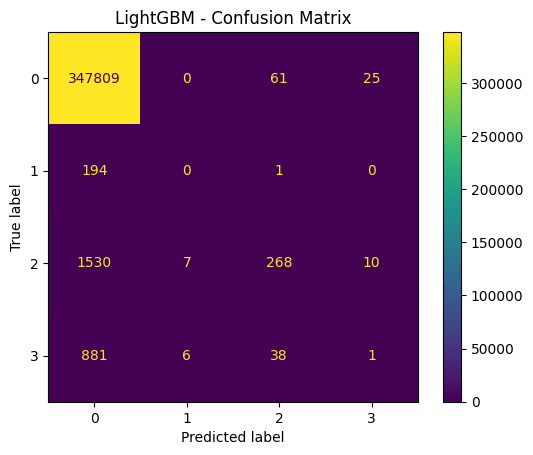

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# Load your data
df = pd.read_csv(r'C:\Users\RISHI RAMAN\Desktop\ml\combined_fraud_data.csv')

# Split features and target
# Drop non-numeric columns like datetime or string IDs
X = df.iloc[:, :-1]

# Drop object or datetime columns
X = X.select_dtypes(include=['number'])

# Target
y = df.iloc[:, -1]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Helper to train, predict, evaluate
def evaluate_model(model, name):
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
evaluate_model(rf, "Random Forest")

# XGBoost
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
)
evaluate_model(xgb_model, "XGBoost")

# LightGBM
lgb_model = lgb.LGBMClassifier(
    n_jobs=-1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
)
evaluate_model(lgb_model, "LightGBM")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict again if needed
y_pred = clf.predict(X_test_scaled)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Fraud (0)', 'Fraud (1)']

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, f1_score, roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# Load data
df = pd.read_csv(r'C:\Users\RISHI RAMAN\Desktop\ml\combined_fraud_data.csv')

# Feature + target split
X = df.iloc[:, :-1]
X = X.select_dtypes(include=['number'])  # Keep only numeric features
y = df.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2
)

# Evaluation function with heatmap
def evaluate_model(model, name):
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred, digits=4))

    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc:.4f}")

    # Confusion matrix heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Fraud', 'Fraud'], 
                yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Models
# rf = RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
# evaluate_model(rf, "Random Forest")

xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
)
evaluate_model(xgb_model, "XGBoost")

lgb_model = lgb.LGBMClassifier(
    n_jobs=-1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
)
evaluate_model(lgb_model, "LightGBM")



=== XGBoost ===


c:\Users\RISHI RAMAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:30:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    347895
           1     0.7589    0.4359    0.5537       195
           2     0.8956    0.9736    0.9329      1815
           3     0.8155    0.7495    0.7811       926

    accuracy                         0.9989    350831
   macro avg     0.8675    0.7897    0.8169    350831
weighted avg     0.9988    0.9989    0.9988    350831



ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].


=== Random Forest ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    347895
           1     0.7500    0.8615    0.8019       195
           2     0.8575    0.9713    0.9109      1815
           3     0.8796    0.6231    0.7295       926

    accuracy                         0.9988    350831
   macro avg     0.8718    0.8640    0.8606    350831
weighted avg     0.9988    0.9988    0.9987    350831



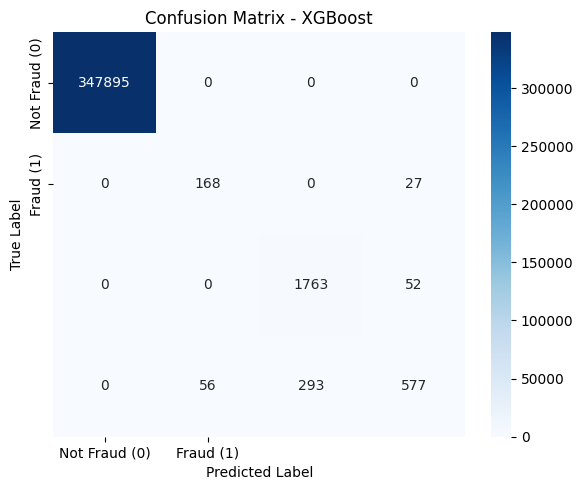


=== XGBoost ===


c:\Users\RISHI RAMAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:34:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    347895
           1     0.7589    0.4359    0.5537       195
           2     0.8956    0.9736    0.9329      1815
           3     0.8155    0.7495    0.7811       926

    accuracy                         0.9989    350831
   macro avg     0.8675    0.7897    0.8169    350831
weighted avg     0.9988    0.9989    0.9988    350831



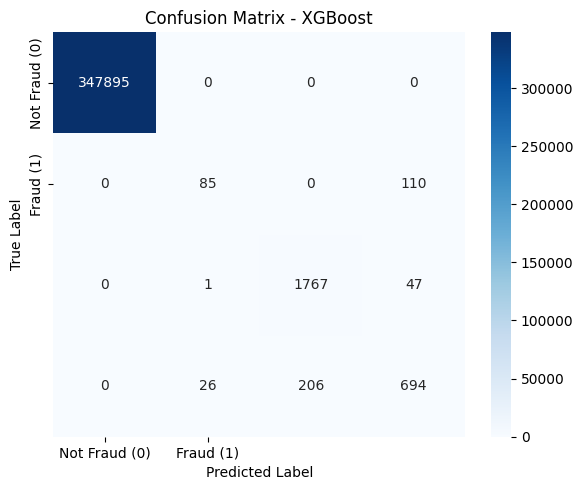


=== LightGBM ===
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1460
[LightGBM] [Info] Number of data points in the train set: 1403324, number of used features: 7
[LightGBM] [Info] Start training from score -0.008405
[LightGBM] [Info] Start training from score -7.497628
[LightGBM] [Info] Start training from score -5.263944
[LightGBM] [Info] Start training from score -5.936916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

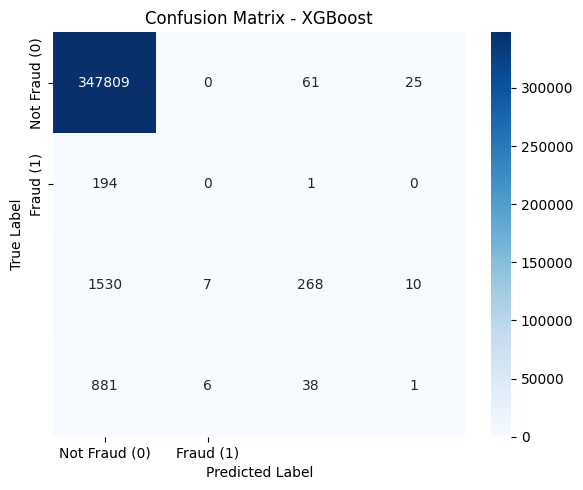

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

df = pd.read_csv(r'C:\Users\RISHI RAMAN\Desktop\ml\combined_fraud_data.csv')

X = df.iloc[:, :-1]

X = X.select_dtypes(include=['number'])

y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

def evaluate_model(model, name):
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred, digits=4))


    cm = confusion_matrix(y_test, y_pred)
    labels = ['Not Fraud (0)', 'Fraud (1)']

    # Plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - XGBoost')
    plt.tight_layout()
    plt.show()



    # cm = confusion_matrix(y_test, y_pred)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.title(f"{name} - Confusion Matrix")
    # plt.show()

rf = RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
evaluate_model(rf, "Random Forest")

xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
)
evaluate_model(xgb_model, "XGBoost")

lgb_model = lgb.LGBMClassifier(
    n_jobs=-1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
)
evaluate_model(lgb_model, "LightGBM")


In [ ]:
y = df.iloc[:, -1].copy()
y = y.apply(lambda val: 0 if val == 0 else 1)



=== Random Forest ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    347895
           1     1.0000    1.0000    1.0000      2936

    accuracy                         1.0000    350831
   macro avg     1.0000    1.0000    1.0000    350831
weighted avg     1.0000    1.0000    1.0000    350831



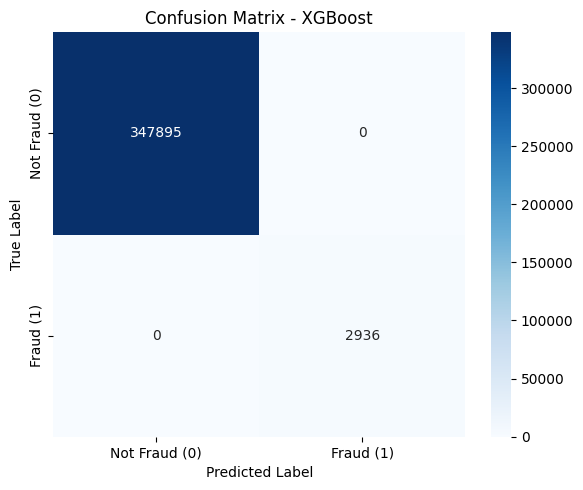


=== XGBoost ===


c:\Users\RISHI RAMAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:38:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    347895
           1     1.0000    1.0000    1.0000      2936

    accuracy                         1.0000    350831
   macro avg     1.0000    1.0000    1.0000    350831
weighted avg     1.0000    1.0000    1.0000    350831



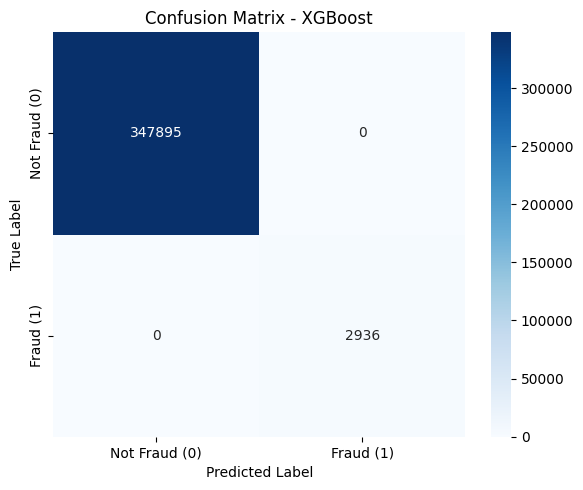


=== LightGBM ===
[LightGBM] [Info] Number of positive: 11745, number of negative: 1391579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1460
[LightGBM] [Info] Number of data points in the train set: 1403324, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008369 -> initscore=-4.774767
[LightGBM] [Info] Start training from score -4.774767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

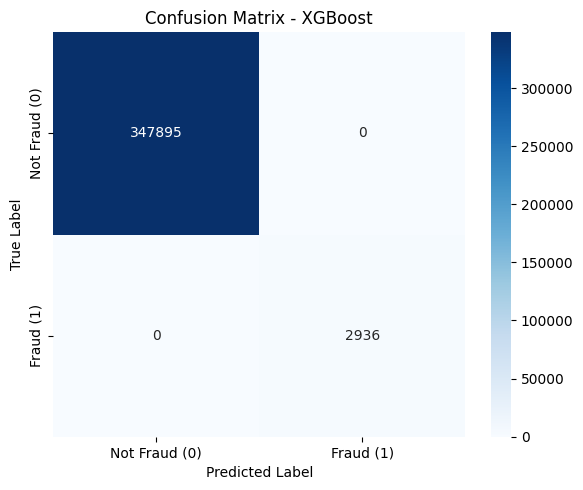

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

df = pd.read_csv(r'C:\Users\RISHI RAMAN\Desktop\ml\combined_fraud_data.csv')

X = df.iloc[:, :-1]

X = X.select_dtypes(include=['number'])
y = df.iloc[:, -1].copy()
y = y.apply(lambda val: 0 if val == 0 else 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

def evaluate_model(model, name):
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred, digits=4))


    cm = confusion_matrix(y_test, y_pred)
    labels = ['Not Fraud (0)', 'Fraud (1)']

    # Plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - XGBoost')
    plt.tight_layout()
    plt.show()



    # cm = confusion_matrix(y_test, y_pred)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.title(f"{name} - Confusion Matrix")
    # plt.show()

rf = RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
evaluate_model(rf, "Random Forest")

xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
)
evaluate_model(xgb_model, "XGBoost")

lgb_model = lgb.LGBMClassifier(
    n_jobs=-1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
)
evaluate_model(lgb_model, "LightGBM")


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2, stratify=y
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


(1403324, 7) (1403324,)
(350831, 7) (350831,)
TX_FRAUD_SCENARIO
0    0.991631
1    0.008369
Name: proportion, dtype: float64
TX_FRAUD_SCENARIO
0    0.991631
1    0.008369
Name: proportion, dtype: float64


# others


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb

# 1. Extract features and target
X = combined_df[features]
y = combined_df[target]
fsdf

# 2. Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Handle imbalance with scale_pos_weight (no resampling)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# 5. Train XGBoost
clf = xgb.XGBClassifier(
    objective='binary:logistic',
    # scale_pos_weight=scale_pos_weight,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train_scaled, y_train)

# 6. Evaluate on test set
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


## resampling

In [17]:
!pip install imbalanced-learn


Original target distribution:
 TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64
Resampled target distribution:
 TX_FRAUD
0    1391579
1    1391579
Name: count, dtype: int64

=== Random Forest ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    347895
           1     1.0000    1.0000    1.0000      2936

    accuracy                         1.0000    350831
   macro avg     1.0000    1.0000    1.0000    350831
weighted avg     1.0000    1.0000    1.0000    350831

ROC AUC Score: 1.0


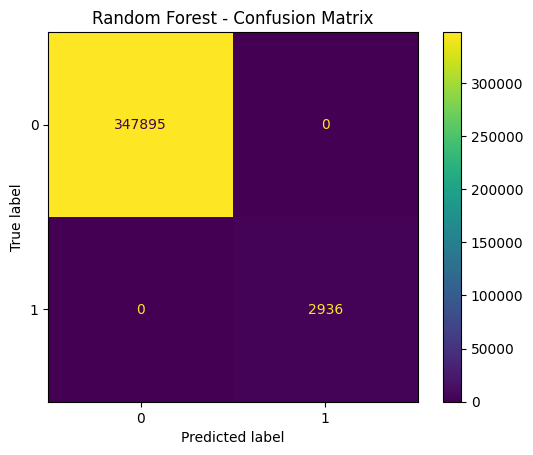

c:\Users\RISHI RAMAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:54:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    347895
           1     1.0000    1.0000    1.0000      2936

    accuracy                         1.0000    350831
   macro avg     1.0000    1.0000    1.0000    350831
weighted avg     1.0000    1.0000    1.0000    350831

ROC AUC Score: 1.0


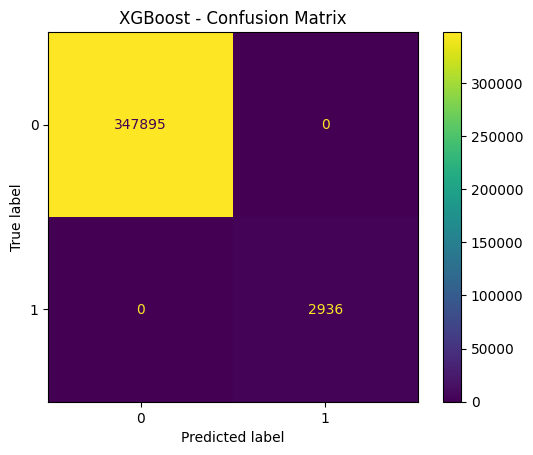

[LightGBM] [Info] Number of positive: 1391579, number of negative: 1391579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1462
[LightGBM] [Info] Number of data points in the train set: 2783158, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

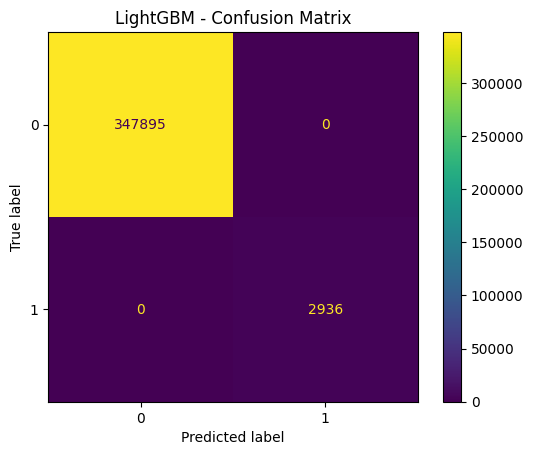

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE

# Load and prepare data
df = pd.read_csv(r'C:\Users\RISHI RAMAN\Desktop\ml\combined_fraud_data.csv')

# Drop datetime or object features
df = df.select_dtypes(include=['number'])

# Binary target
df['TX_FRAUD'] = df['TX_FRAUD'].apply(lambda x: 0 if x == 0 else 1)

# Feature/Target split
X = df.drop('TX_FRAUD', axis=1)
y = df['TX_FRAUD']

# Train-test split (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only on training data
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("Original target distribution:\n", y.value_counts())
print("Resampled target distribution:\n", pd.Series(y_train_smote).value_counts())

# Evaluation function
def evaluate_model(model, name):
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
evaluate_model(rf, "Random Forest")

# XGBoost
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
)
evaluate_model(xgb_model, "XGBoost")

# LightGBM
lgb_model = lgb.LGBMClassifier(
    n_jobs=-1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
)
evaluate_model(lgb_model, "LightGBM")


Original class distribution:
TX_FRAUD
0    1391579
1      11745
Name: count, dtype: int64

After SMOTE class distribution:
TX_FRAUD
0    1391579
1    1391579
Name: count, dtype: int64

=== Random Forest Evaluation ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    347895
           1     1.0000    1.0000    1.0000      2936

    accuracy                         1.0000    350831
   macro avg     1.0000    1.0000    1.0000    350831
weighted avg     1.0000    1.0000    1.0000    350831



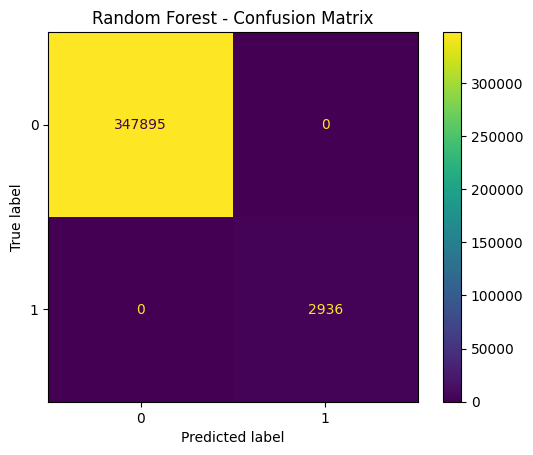

ROC AUC Score: 1.0000


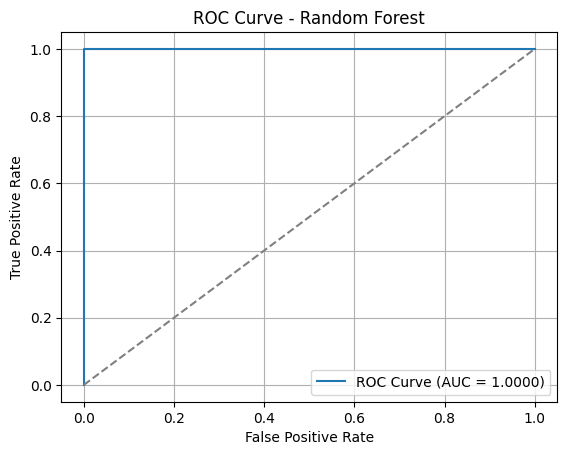

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r'C:\Users\RISHI RAMAN\Desktop\ml\combined_fraud_data.csv')

# Drop leakage-prone or non-numeric columns
df = df.drop(columns=['TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID'])

# Features and target
X = df.drop(columns=['TX_FRAUD'])
y = df['TX_FRAUD']

# Train-test split (BEFORE SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Show original class distribution
print("Original class distribution:")
print(y_train.value_counts())

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE class distribution:")
print(y_train_sm.value_counts())

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_sm, y_train_sm)

# Predict
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Classification report
print("\n=== Random Forest Evaluation ===")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()
